In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [2]:
import pandas as pd
import numpy as np


Read data from files

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ml_practice/linear_regression/homeprices_le.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


Convert cateogrical value to numerical value using Label Encoder.
- Integer encoder gives ranking while for Nominal data - categorial data that doesnt want to be ranked. eg., color, gender.
- One hot Encoder doesnt gives ranking, it keeps 1 for its respective columns and else 0.

## Using Pandas - Method 1

Creating (0 /1) - dummy variables using Pandas for the categorial values.  

In [6]:
dummies = pd.get_dummies(df.town, dtype=int)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [8]:
merge = pd.concat([df, dummies], axis = 'columns')
merge

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


We can drop
1. 'town' column since we have numerical values respectively
2. one of the catergorical columns since it may lead to multicollinearity

In [10]:
final = merge.drop(['town', 'west windsor'], axis = 'columns') # drop needs only column names
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Making the X - input, y - target ready for model training

In [18]:
X = final.drop('price', axis = 'columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [19]:
y = final['price']
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000
5,585000
6,615000
7,650000
8,710000
9,575000


Training the model

In [20]:
model.fit(X, y)

LinearRegression()

In [21]:
model.predict([[2800,0,1]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [22]:
model.predict([[3400,0,0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

Checking accuracy of model

In [23]:
model.score(X, y)

0.9573929037221872

## Using Sklearn for One Hot Encoder

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
le = LabelEncoder()


In [26]:
dfle = df
dfle.town = le.fit_transform(dfle.town) # takes categorical column and returns label
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


Taking X, y arrays

In [38]:
X = dfle[['town','area']].values # taking 2D array instead dataframes
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [39]:
y = dfle.price
y

,price
0,550000
1,565000
2,610000
3,680000
4,725000
5,585000
6,615000
7,650000
8,710000
9,575000


In [43]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

X = ColumnTransformer(
    [("ohe", OneHotEncoder(handle_unknown="ignore"), [0])],  # town is column 0
    remainder="passthrough"
).fit_transform(X)


In [44]:
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

Dropping one of the cateogrical columns

In [49]:
X = X[:, 1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [50]:
model.fit(X, y)

LinearRegression()

In [51]:
model.predict([[1,0,2800]]) # Robin, West

array([590775.63964739])

## Excerise

In [53]:
df_car = pd.read_csv('/content/drive/MyDrive/ml_practice/linear_regression/carprices.csv')
df_car

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


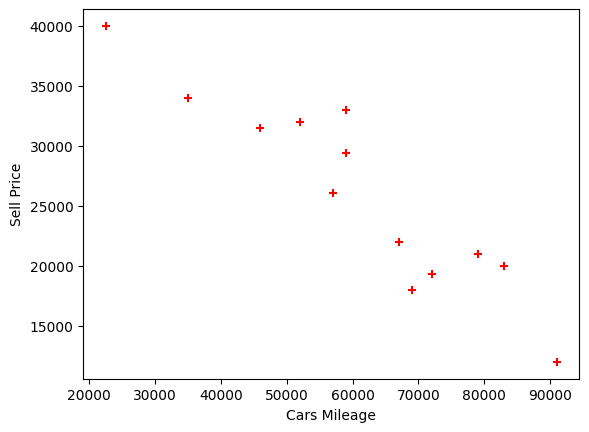

In [54]:
import matplotlib.pyplot as plt
plt.xlabel('Cars Mileage')
plt.ylabel('Sell Price')
plt.scatter(df_car['Mileage'], df_car['Sell Price($)'], color ='red', marker = '+')

In [55]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [56]:
df_car['Car Model'] = le.fit_transform(df_car['Car Model'])
df_car

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [57]:
X_car = df_car[['Car Model', 'Mileage', 'Age(yrs)']].values
X_car

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]])

In [58]:
Y_car = df_car['Sell Price($)']
Y_car

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [59]:
ohe_car = OneHotEncoder()
X_car = ColumnTransformer(
    [("ohe_car", OneHotEncoder(handle_unknown="ignore"), [0])],  # town is column 0
    remainder="passthrough"
).fit_transform(X_car)

In [60]:
X_car

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [61]:
X_car = X_car[:,1:]
X_car

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [63]:
model_car = LinearRegression()


In [64]:
model_car.fit(X_car, Y_car)

LinearRegression()

In [65]:
model_car.predict([[0,1,45000,4]])

array([36991.31721062])

In [66]:
model_car.predict([[1,0,86000,7]])

array([11080.74313219])